In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from numpy.linalg import inv
import statsmodels.api as sm
import pandas as pd
import re
from sklearn.linear_model import LinearRegression

**Nel caso austriaco, l'impatto di uno shock finanziario sul saldo partite correnti è rilevante, e pari al 6% nei due trimestri successivi allo shock, ma il test di granger causalità sembra suggerire che in questo caso, visto il forte surpluss, sia la bilancia commerciale ad influenzare l'indice e non vice-versa**

In [2]:
df = pd.read_csv('/Users/tiziana/Desktop/PYTHON/TESI MAGISTRALE/PCA/DATESET.csv')
df=df.iloc[:, 1:]
df.head()

nazioni = df.groupby('Country').sum().index
nazioni

/var/folders/dh/zp5lxqxj269938btf9rcxlh40000gn/T/ipykernel_52325/3298185633.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nazioni = df.groupby('Country').sum().index


Index(['Austria', 'Belgium', 'Finland', 'France', 'Germany', 'Greece',
       'Ireland', 'Italy', 'Japan', 'Netherlands', 'Portugal', 'Spain',
       'Sweden', 'United Kingdom', 'United States'],
      dtype='object', name='Country')

In [3]:
df.set_index(['Country'],inplace=True)
aus = pd.DataFrame(df.loc['Austria'])



aus.reset_index(inplace=True)
aus=aus.drop(['Country','Trimestre'],axis=1)

In [4]:
aus.head(50)

,Gdp growth,Current Account,Public Debt,Financial index
0,-0.098012,-1.723625,-0.960817,-1.626974
1,-0.152426,-1.579979,-0.880322,-1.563745
2,-0.180833,-1.880744,-0.774585,-1.431377
3,-0.008625,-1.415842,-1.594316,-1.467622
4,-0.375992,-2.589976,-1.009146,-1.495017
5,-0.374608,-2.120603,-0.894174,-1.476052
6,-0.304040,-1.253331,-0.914644,-1.463733
7,-0.212912,-1.141858,-1.501200,-1.491166
8,-0.081414,0.408356,-0.857235,-1.454115
9,-0.218929,-0.715114,-0.960048,-1.380397


In [5]:
dftest = adfuller(aus['Gdp growth'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print(f'Gdp growth is Stationary ')
else:
    print('Non stationary')



dftest = adfuller(aus['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(aus['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(aus['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print(f'Financial Index Non stationary')

Gdp growth is Stationary 
Current Account is Stationary
Public Debt Non stationary
Financial Index Non stationary


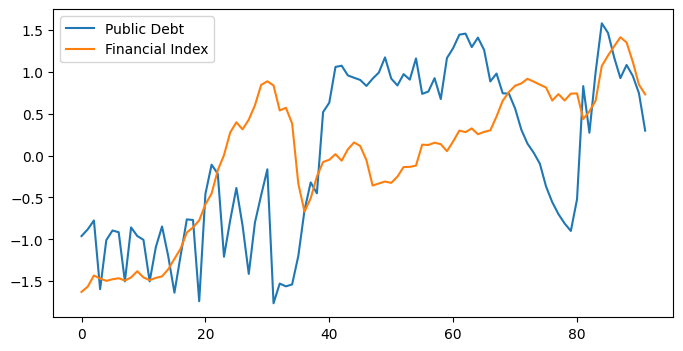

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 4))
plt.plot(aus['Public Debt'], label='Public Debt')
plt.plot(aus['Financial index'], label='Financial Index')


plt.legend()

In [7]:
from statsmodels.tsa.api import VAR
model = VAR(aus)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()


,AIC,BIC,FPE,HQIC
0,-2.684,-2.568,0.06829,-2.637
1,-7.573,-6.995*,0.0005142,-7.341*
2,-7.687,-6.645,0.0004605,-7.268
3,-7.691,-6.187,0.0004614,-7.086
4,-7.582,-5.614,0.0005213,-6.791
5,-7.829,-5.398,0.0004156,-6.852
6,-7.984*,-5.090,0.0003671*,-6.821
7,-7.923,-4.566,0.0004080,-6.573
8,-7.800,-3.980,0.0004899,-6.264


In [8]:
aus_coin = aus.drop(['Gdp growth','Current Account'],axis=1)
aus_coin

,Public Debt,Financial index
0,-0.960817,-1.626974
1,-0.880322,-1.563745
2,-0.774585,-1.431377
3,-1.594316,-1.467622
4,-1.009146,-1.495017
...,...,...
87,0.924595,1.412019
88,1.081276,1.350124
89,0.951221,1.119711
90,0.743441,0.846245


In [9]:

from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
test = coint_johansen(aus_coin, det_order=1, k_ar_diff=4)

output = pd.DataFrame([test.lr1],  index=["trace_stat"], columns=['r=0', 'r<=1'])
print(output.T, '\n')

cvt = pd.DataFrame(test.cvt, index=["r=0", "r<=1"], columns=["90%", "95%", "99%"])
print("Critical values(90%, 95%, 99%) of trace_stat\n", cvt, '\n')

print("Eigenvalues (lambda):\n")
print(test.eig, "\n")

print("Eigenvectors:")
evec = pd.DataFrame(test.evec).T
print(evec)

      trace_stat
r=0    13.759837
r<=1    3.099043 

Critical values(90%, 95%, 99%) of trace_stat
           90%      95%      99%
r=0   16.1619  18.3985  23.1485
r<=1   2.7055   3.8415   6.6349 

Eigenvalues (lambda):

[0.11532759 0.03499422] 

Eigenvectors:
          0         1
0  1.389998  1.976830
1 -0.855916  1.720644


In [10]:

aus['Public Debt'] = aus['Public Debt'].diff(1)
aus['Financial index'] = aus['Financial index'].diff(1)

aus=aus.iloc[1:]

In [11]:
dftest = adfuller(aus['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(aus['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(aus['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print('Financial Index Non stationary')

Current Account is Stationary
Public Debt is Stationary
Financial Index is Stationary


In [12]:
from statsmodels.tsa.api import VAR
model = VAR(aus)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-7.359,-7.242*,0.0006368,-7.312
1,-7.687,-7.104,0.0004589,-7.453*
2,-7.680,-6.631,0.0004636,-7.258
3,-7.658,-6.143,0.0004772,-7.049
4,-7.800,-5.818,0.0004195,-7.004
5,-7.921,-5.473,0.0003795*,-6.938
6,-7.927*,-5.013,0.0003898,-6.756
7,-7.785,-4.405,0.0004702,-6.427
8,-7.924,-4.077,0.0004357,-6.379


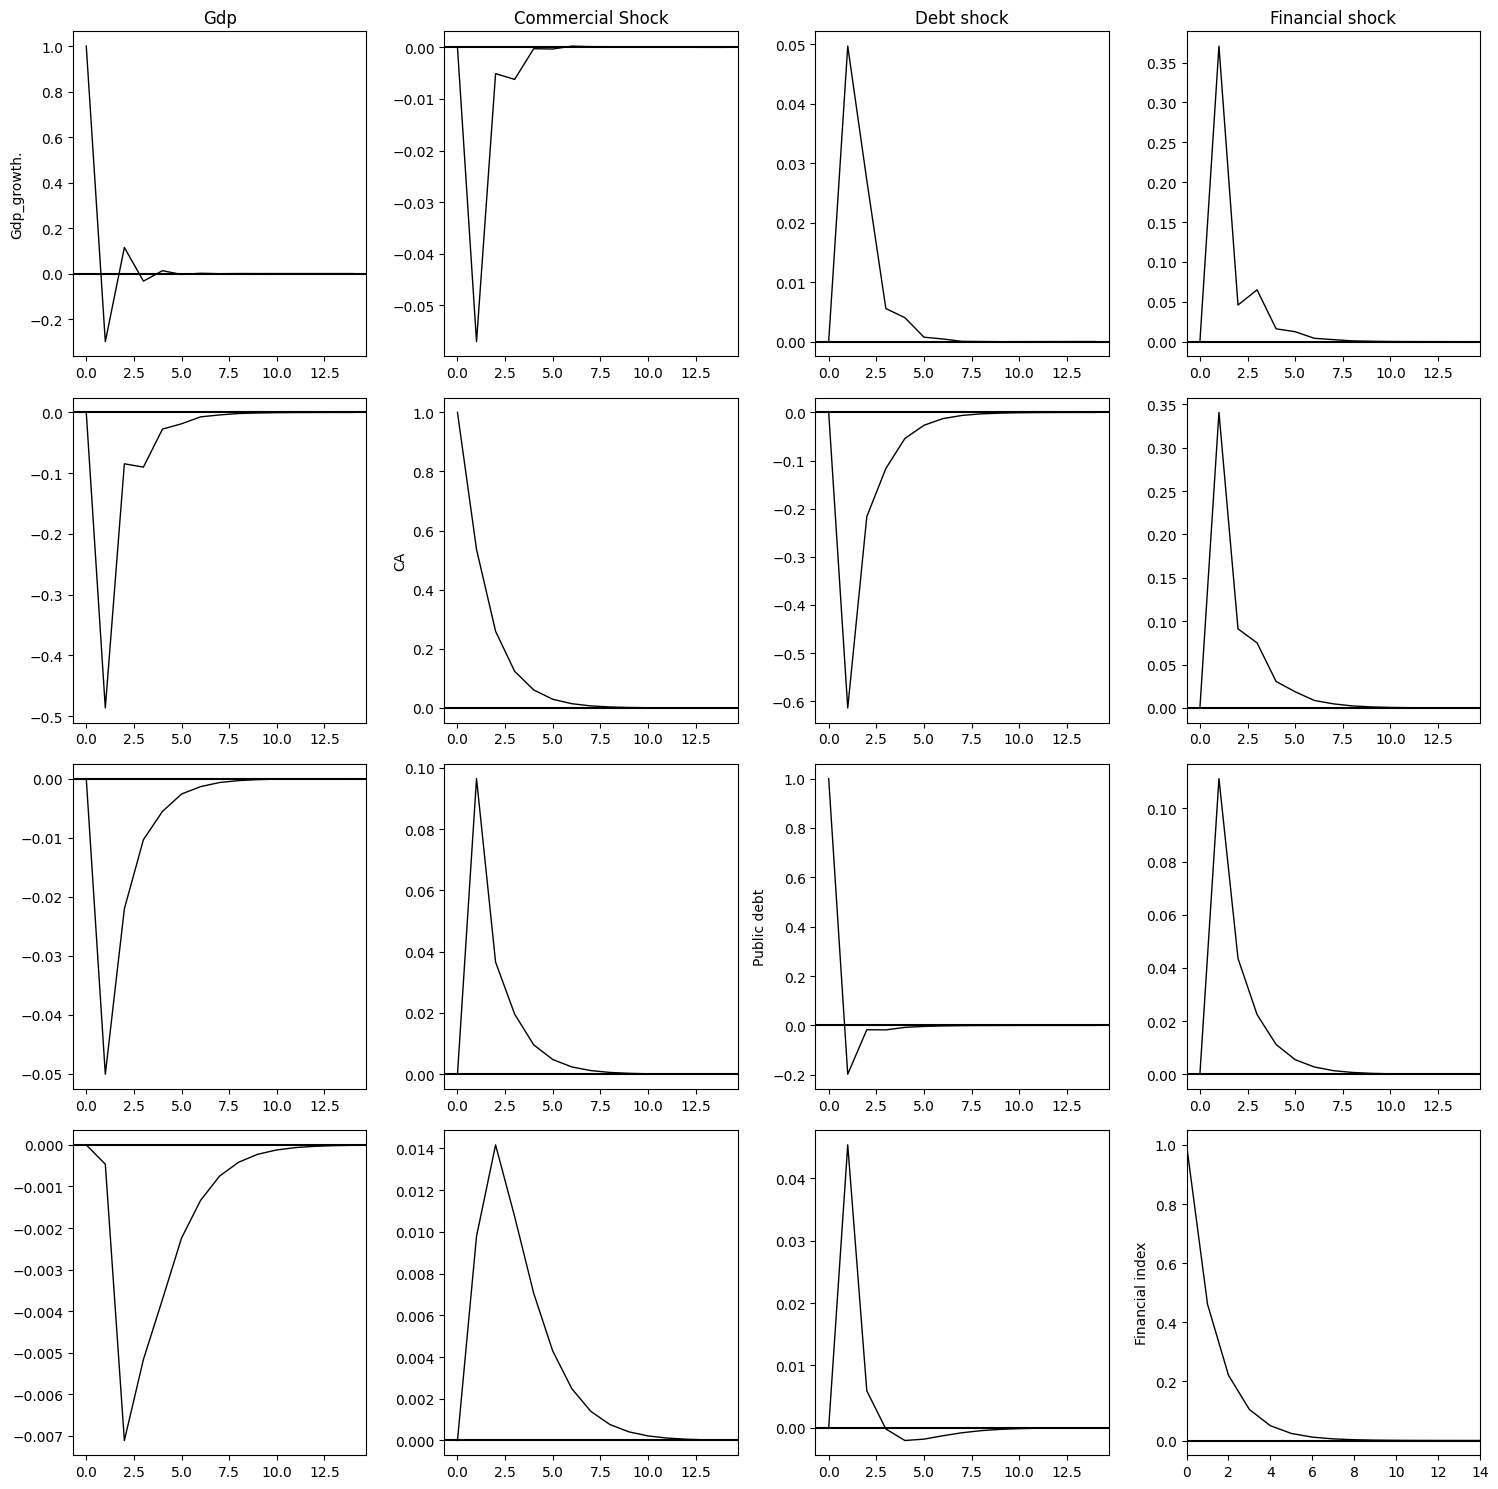

In [13]:
m = 4  #Considered Variable
p = 1 #Number of lags based on AIC criterion
c = 1  #Constant term
h = 15 #IRF horizon

T = len(aus)
Y = aus.iloc[p:, :] #Building a VAR(5) is not possible to consider first 5 observations

X_lagged  = pd.DataFrame()
for col in aus.columns:
    for i in range(1, p+1):
        X_lagged[f'{col}_lag_{i}'] = aus[col].shift(i)
X_lagged = X_lagged.iloc[p:,:]
X_lagged = X_lagged[[col for lag in sorted(set(int(re.search(r'_lag_(\d+)$', col).group(1)) 
                                               if re.search(r'_lag_(\d+)$', col) else 0 for col in X_lagged.columns)) 
                                               for col in [x for x in X_lagged.columns if re.search(fr'_lag_{lag}$', x)]] + 
                                               [x for x in X_lagged.columns if not re.search(r'_lag_\d+$', x)]]
X_lagged.insert(0, 'const', 1)


pi_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_lagged.T, X_lagged)), X_lagged.T), Y) 
Y_fit = np.dot(X_lagged, pi_hat)
err = Y - Y_fit

A_comp = np.block([
[pi_hat[1:, :].T],
[np.eye(m * p - m), np.zeros((m * p - m, m))]
])



PHI = np.zeros((m, m, h))
for j in range(h):
    PHI_comp = np.linalg.matrix_power(A_comp, j)
    PHI[:, :, j] = PHI_comp[:m, :m]






PHI_plot = np.reshape(np.transpose(PHI, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp_growth.', 'CA', 'Public debt','Financial index']
Shocknames = ['Gdp', 'Commercial Shock', 'Debt shock','Financial shock']

ylab = 0

fig, axes = plt.subplots(m, m, figsize=(15, 15))
axes_flat = axes.flatten()
for k in range(m*m): 
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_plot[:, k], linewidth=1, color='k')
    ax.axhline(0, color='k', linestyle='-')
    if k < 4: 
        ax.set_title(Shocknames[k]) 
    if k in [0, 5, 10,15]: 
        ax.set_ylabel(VARnames[ylab]) 
        ylab += 1
ax.set_xlim([0, h-1])
plt.tight_layout() 
plt.show()

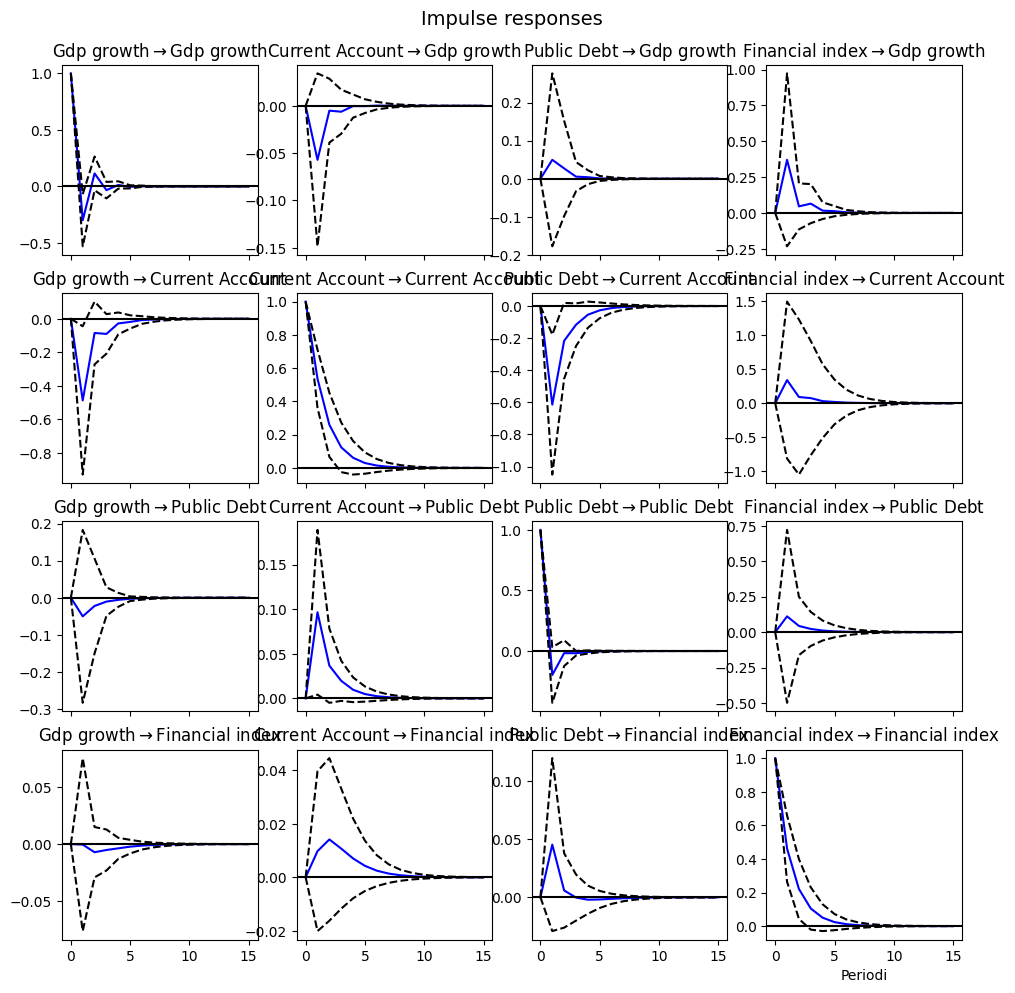

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 214.120, critical value: 173.004>, p-value: 0.000>


In [14]:
model = sm.tsa.VAR(aus)

# Stima il modello con un ordine di 6
results = model.fit(1)
irf = results.irf(15)

irf.plot(orth=False)
plt.xlabel('Periodi')

plt.show()

whiteness_test_result = results.test_whiteness(nlags=10)
print(whiteness_test_result)

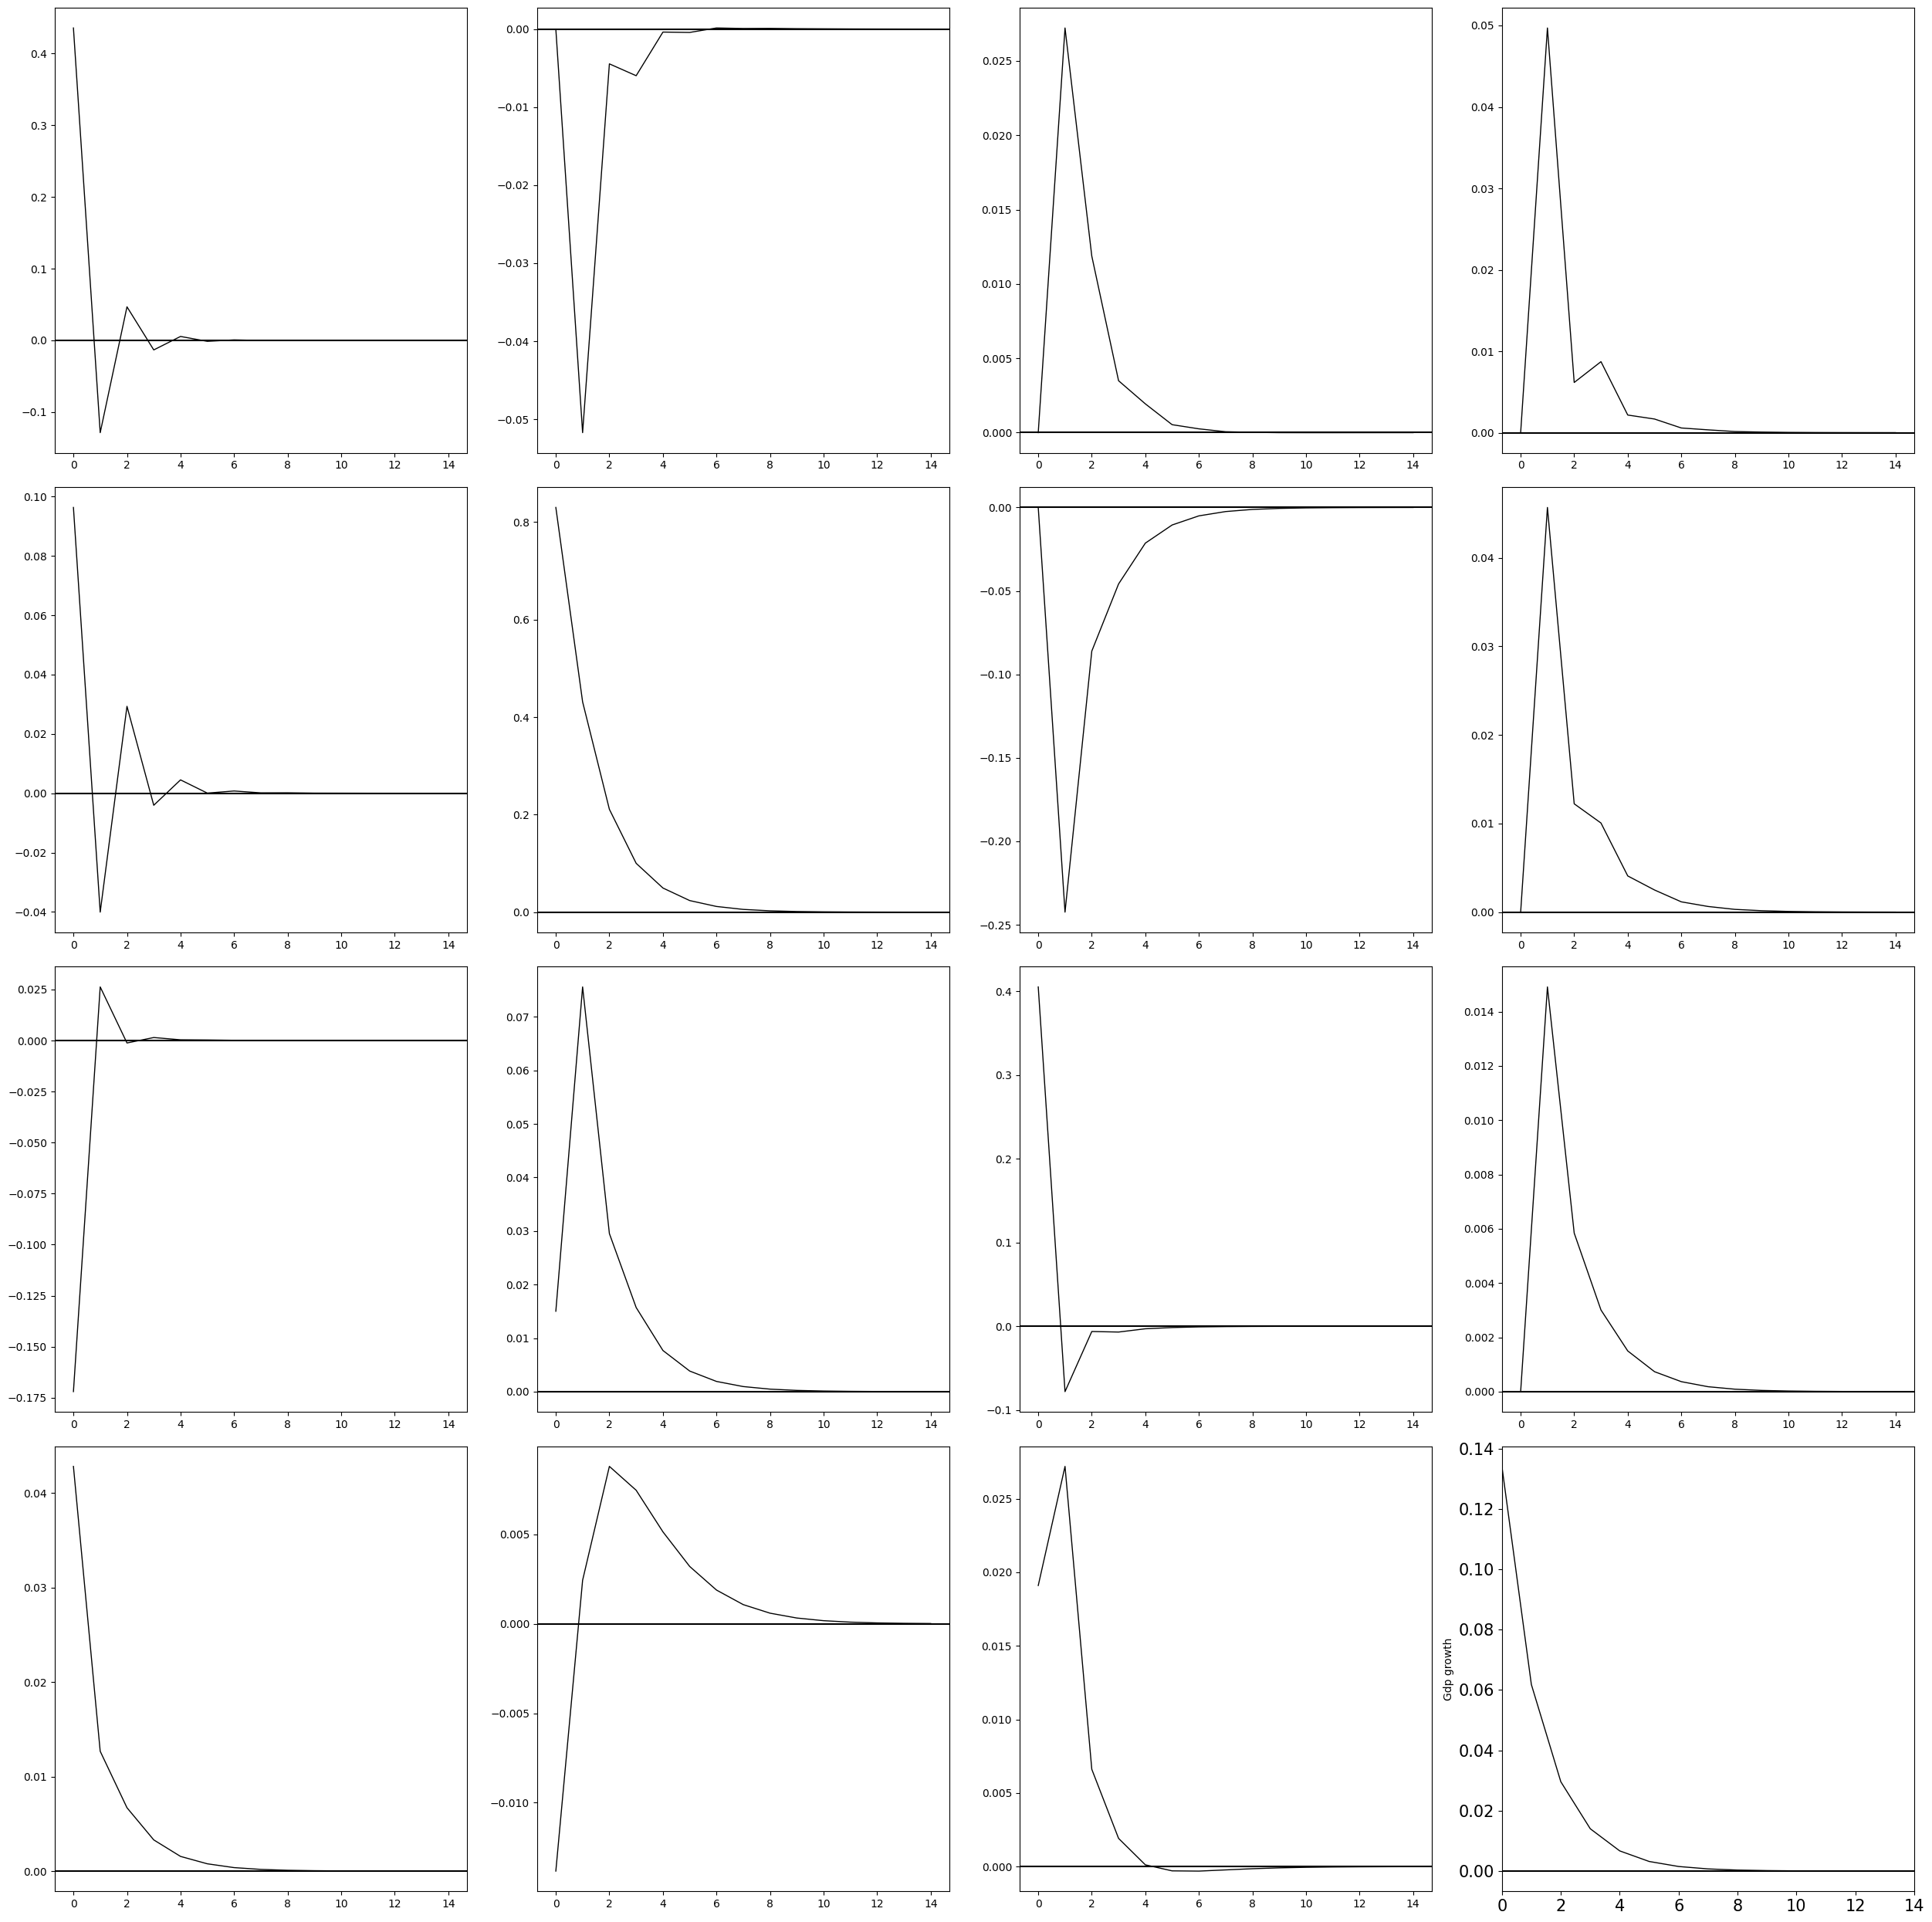

In [15]:
T = len(aus) - m * p - m

omega = np.dot(err.T, err) / T

P = np.linalg.cholesky(omega)
PHI_SR = np.zeros((m, m, h))

for i in range(h):
    PHI_SR[:, :, i] = np.dot(PHI[:, :, i], P)
    
PHI_SR_plot = np.reshape(np.transpose(PHI_SR, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp growth', 'Current Account', 'Public Debt','Financil index'] 
Shocknames = ['Gdp shock', 'Commercial shock', 'Debt shock','Financial shock']
ylab = 0
# Create subplots
fig, axes = plt.subplots(m, m, figsize=(25, 25))
axes_flat = axes.flatten()
for k in range(m*m): 
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_SR_plot[:, k], linewidth=1, color='k')
    ax.axhline(0, color='k', linestyle='-')
if k < 4: 
    ax.set_title(Shocknames[k]) 
if k in [0, 5, 10, 15]: 
    ax.set_ylabel(VARnames[ylab]) 
    ylab += 1

ax.set_xlim([0, h-1]) 
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout() 
plt.show()

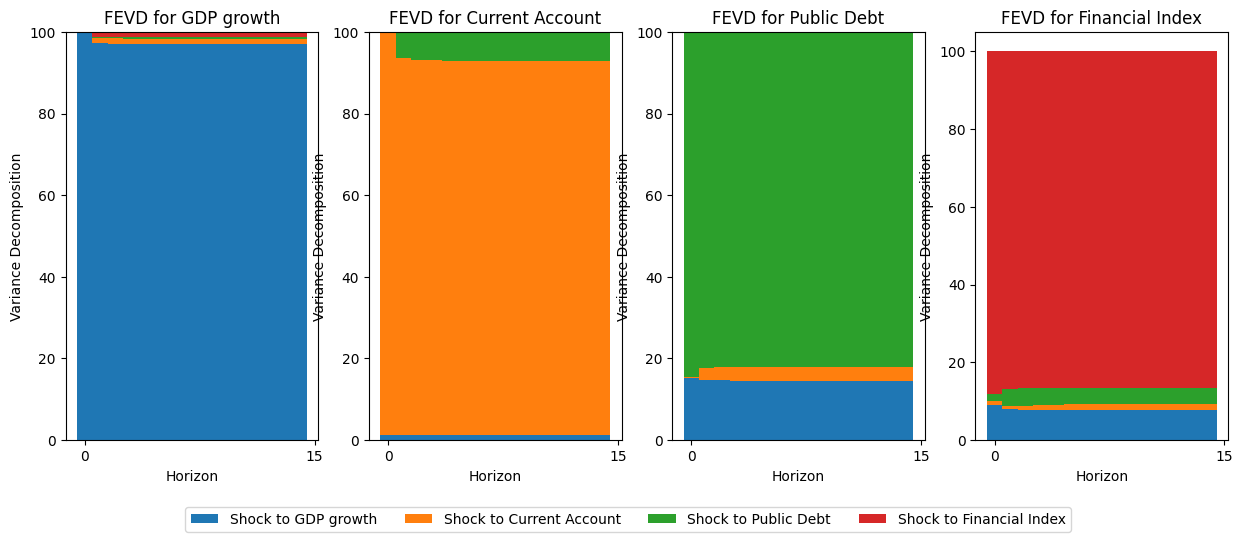

In [16]:
h = 15
MSE = np.zeros((m, m, h))
MSE_shock = np.zeros((m, m, h))
FEVD = np.zeros((h, m, m))

MSE[:, :, 0] = omega
for ii in range(m):
    for nn in range(1, h):
        MSE[:, :, nn] = MSE[:, :, nn - 1] + PHI[:, :, nn] @ omega @ PHI[:, :, nn].T
    MSE_shock[:, :, 0] = P[:, ii].reshape(-1, 1) @ P[:, ii].reshape(1, -1)

    for nn in range(1, h):
        MSE_shock[:, :, nn] = MSE_shock[:, :, nn - 1] + PHI[:, :, nn] @ MSE_shock[:, :, 0] @ PHI[:, :, nn].T
    FECD = MSE_shock[:, :, :] / MSE[:, :, :]

    for nn in range(h):
        for kk in range(m):
            FEVD[nn, ii, kk] = 100 * FECD[kk, kk, nn]

def plot_FEVD(FEVD_result, variable_names, horizon=40):
    """
    Plot FEVD results using stacked bar plots in subplots.
    FEVD_result: The FEVD matrix of shape (n, n, horizon)
    variable_names: List of names of the variables
    horizon: The number of periods ahead for the forecast
    """
    FEVD_result = FEVD_result.transpose((2, 1, 0))
    n = FEVD_result.shape[0]
    cols = 4
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6 * rows))
    fig.subplots_adjust(bottom=0.2, hspace=0.4)

    if rows == 1:
        axes = axes.flatten()
    for i in range(n):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        bottom_values = np.zeros(horizon)
        for j in range(n):
            ax.bar(np.arange(horizon), FEVD_result[i, j, :], bottom=bottom_values, width=1, label=f"Shock to {variable_names[j]}")
            bottom_values += FEVD_result[i, j, :]
        ax.set_title(f"FEVD for {variable_names[i]}")
        ax.set_xlabel("Horizon")
        ax.set_ylabel("Variance Decomposition")
        ax.set_xticks(np.linspace(0, horizon, int(horizon / 10) + 1, endpoint=True))

    for i in range(n, rows * cols):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        ax.axis('off')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=len(variable_names))

variable_names = ['GDP growth', 'Current Account', 'Public Debt', 'Financial Index']
plot_FEVD(FEVD, variable_names, h)


In [17]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(aus[['Current Account', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0078  , p=0.9297  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.0081  , p=0.9283  , df=1
likelihood ratio test: chi2=0.0081  , p=0.9283  , df=1
parameter F test:         F=0.0078  , p=0.9297  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0751  , p=0.9277  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=0.1592  , p=0.9235  , df=2
likelihood ratio test: chi2=0.1591  , p=0.9235  , df=2
parameter F test:         F=0.0751  , p=0.9277  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5772  , p=0.6316  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=1.8813  , p=0.5974  , df=3
likelihood ratio test: chi2=1.8614  , p=0.6017  , df=3
parameter F test:         F=0.5772  , p=0.6316  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (0.007835005025586613, 0.9296703527225502, 87.0, 1),
   'ssr_chi2test': (0.008105177612675808, 0.9282643605111497, 1),
   'lrtest': (0.008104812668477734, 0.9282659711574253, 1),
   'params_ftest': (0.007835005025583533, 0.9296703527225502, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.07513056466919764, 0.927684625600651, 84.0, 2),
   'ssr_chi2test': (0.15920524417996645, 0.9234832453250038, 2),
   'lrtest': (0.1590630187666875, 0.9235489190532057, 2),
   'params_ftest': (0.07513056466919255, 0.927684625600651, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5772085946808766, 0.6316379125584064, 81.0, 3),
   'ssr_chi2test': (1.881272456737672, 0.5974107863803728, 3),
   'lrtest': (1.8614455220489958, 0.6016558394526164, 3),
   'params_ftest': (0.5772085946808729, 0.6316379125584104, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

In [18]:
grangercausalitytests(aus[['Public Debt', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0180  , p=0.8937  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.0186  , p=0.8916  , df=1
likelihood ratio test: chi2=0.0186  , p=0.8916  , df=1
parameter F test:         F=0.0180  , p=0.8937  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5662  , p=0.2149  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=3.3189  , p=0.1902  , df=2
likelihood ratio test: chi2=3.2585  , p=0.1961  , df=2
parameter F test:         F=1.5662  , p=0.2149  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9490  , p=0.1283  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=6.3523  , p=0.0957  , df=3
likelihood ratio test: chi2=6.1335  , p=0.1053  , df=3
parameter F test:         F=1.9490  , p=0.1283  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (0.017954274471822452, 0.8937171463142829, 87.0, 1),
   'ssr_chi2test': (0.018573387384643914, 0.8915966016912305, 1),
   'lrtest': (0.018571471144269935, 0.8916021593610772, 1),
   'params_ftest': (0.01795427447181049, 0.8937171463143113, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.5662144023754, 0.21487088385252456, 84.0, 2),
   'ssr_chi2test': (3.318882900271681, 0.1902452118681352, 2),
   'lrtest': (3.258497606214007, 0.19607681110929764, 2),
   'params_ftest': (1.5662144023753959, 0.21487088385252537, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.949000623994975, 0.12825629477658443, 81.0, 3),
   'ssr_chi2test': (6.352298330057698, 0.0956730772389197, 3),
   'lrtest': (6.133495865966921, 0.1052929450008493, 3),
   'params_ftest': (1.9490006239949669, 0.1282562947765859, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [19]:
grangercausalitytests(aus[['Gdp growth', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8290  , p=0.1797  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=1.8921  , p=0.1690  , df=1
likelihood ratio test: chi2=1.8725  , p=0.1712  , df=1
parameter F test:         F=1.8290  , p=0.1797  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6417  , p=0.0304  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=7.7170  , p=0.0211  , df=2
likelihood ratio test: chi2=7.4006  , p=0.0247  , df=2
parameter F test:         F=3.6417  , p=0.0304  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3799  , p=0.0222  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=11.0159 , p=0.0116  , df=3
likelihood ratio test: chi2=10.3790 , p=0.0156  , df=3
parameter F test:         F=3.3799  , p=0.0222  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (1.8290222639797993, 0.1797479210261787, 87.0, 1),
   'ssr_chi2test': (1.8920919972204822, 0.16896615371384563, 1),
   'lrtest': (1.8724774719783, 0.17119160111074366, 1),
   'params_ftest': (1.8290222639797895, 0.1797479210261787, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.6417352789489548, 0.03042706002952404, 84.0, 2),
   'ssr_chi2test': (7.7170104720585, 0.021099514757714984, 2),
   'lrtest': (7.400610502900122, 0.024715980729766416, 2),
   'params_ftest': (3.6417352789489446, 0.030427060029524503, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.3798767760911628, 0.022174092214182366, 81.0, 3),
   'ssr_chi2test': (11.015894677630456, 0.011640236793981134, 3),
   'lrtest': (10.379034606031496, 0.015604332778587408, 3),
   'params_ftest': (3.3798767760911654, 0.02217409221418221, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

In [20]:
grangercausalitytests(aus[['Financial index', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6529  , p=0.4213  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.6754  , p=0.4112  , df=1
likelihood ratio test: chi2=0.6729  , p=0.4121  , df=1
parameter F test:         F=0.6529  , p=0.4213  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8203  , p=0.4438  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=1.7382  , p=0.4193  , df=2
likelihood ratio test: chi2=1.7215  , p=0.4229  , df=2
parameter F test:         F=0.8203  , p=0.4438  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2683  , p=0.2908  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=4.1338  , p=0.2474  , df=3
likelihood ratio test: chi2=4.0396  , p=0.2572  , df=3
parameter F test:         F=1.2683  , p=0.2908  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (0.6528818588045832, 0.4212880801448583, 87.0, 1),
   'ssr_chi2test': (0.6753950263495687, 0.41117695480763083, 1),
   'lrtest': (0.6728734203358044, 0.412051592173449, 1),
   'params_ftest': (0.6528818588045758, 0.4212880801448583, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.8202820373046164, 0.44380297710986394, 84.0, 2),
   'ssr_chi2test': (1.7382166980978777, 0.41932527438640144, 2),
   'lrtest': (1.7214603777404704, 0.4228532068573704, 2),
   'params_ftest': (0.8202820373046296, 0.4438029771098576, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.2683191914735932, 0.2908190535242931, 81.0, 3),
   'ssr_chi2test': (4.133781068506526, 0.24737584398806847, 3),
   'lrtest': (4.039626657360259, 0.2572168371168577, 3),
   'params_ftest': (1.2683191914736034, 0.2908190535242898, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0

In [21]:
grangercausalitytests(aus[['Public Debt', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0969  , p=0.0460  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=4.2382  , p=0.0395  , df=1
likelihood ratio test: chi2=4.1414  , p=0.0418  , df=1
parameter F test:         F=4.0969  , p=0.0460  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2126  , p=0.1158  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=4.6885  , p=0.0959  , df=2
likelihood ratio test: chi2=4.5692  , p=0.1018  , df=2
parameter F test:         F=2.2126  , p=0.1158  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0204  , p=0.3881  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=3.3258  , p=0.3441  , df=3
likelihood ratio test: chi2=3.2645  , p=0.3526  , df=3
parameter F test:         F=1.0204  , p=0.3881  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (4.096908562451142, 0.046029429766261544, 87.0, 1),
   'ssr_chi2test': (4.2381812715011815, 0.0395244859657984, 1),
   'lrtest': (4.141417543655166, 0.04184611312975462, 1),
   'params_ftest': (4.096908562451154, 0.046029429766261544, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.2125567437221476, 0.11575872319024044, 84.0, 2),
   'ssr_chi2test': (4.688513099792169, 0.09591848623768773, 2),
   'lrtest': (4.569190551436691, 0.10181526087696983, 2),
   'params_ftest': (2.2125567437221325, 0.11575872319024158, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.0204248712407245, 0.3880558662577716, 81.0, 3),
   'ssr_chi2test': (3.3258292099697684, 0.34406384855803074, 3),
   'lrtest': (3.2645217379842677, 0.3526111614372503, 3),
   'params_ftest': (1.0204248712407213, 0.38805586625777305, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [22]:
grangercausalitytests(aus[['Gdp growth', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5807  , p=0.2120  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=1.6352  , p=0.2010  , df=1
likelihood ratio test: chi2=1.6205  , p=0.2030  , df=1
parameter F test:         F=1.5807  , p=0.2120  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1669  , p=0.3163  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=2.4728  , p=0.2904  , df=2
likelihood ratio test: chi2=2.4391  , p=0.2954  , df=2
parameter F test:         F=1.1669  , p=0.3163  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6215  , p=0.6031  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=2.0256  , p=0.5671  , df=3
likelihood ratio test: chi2=2.0027  , p=0.5718  , df=3
parameter F test:         F=0.6215  , p=0.6031  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (1.5807005591263603, 0.21202447132273217, 87.0, 1),
   'ssr_chi2test': (1.6352074749583039, 0.20098429190088335, 1),
   'lrtest': (1.620529972411731, 0.20301790632663894, 1),
   'params_ftest': (1.5807005591263337, 0.21202447132273658, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.166938967587913, 0.31631337729576514, 84.0, 2),
   'ssr_chi2test': (2.4727992408410535, 0.29042798882612386, 2),
   'lrtest': (2.4390701244924173, 0.2953674624891478, 2),
   'params_ftest': (1.1669389675879016, 0.3163133772957687, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6215053418106944, 0.6031089533894578, 81.0, 3),
   'ssr_chi2test': (2.0256470399755964, 0.5671006662452114, 3),
   'lrtest': (2.002684848338504, 0.5718496411918366, 3),
   'params_ftest': (0.6215053418106877, 0.6031089533894618, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [23]:
grangercausalitytests(aus[['Financial index', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0330  , p=0.1575  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=2.1031  , p=0.1470  , df=1
likelihood ratio test: chi2=2.0789  , p=0.1494  , df=1
parameter F test:         F=2.0330  , p=0.1575  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0548  , p=0.3528  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=2.2351  , p=0.3271  , df=2
likelihood ratio test: chi2=2.2075  , p=0.3316  , df=2
parameter F test:         F=1.0548  , p=0.3528  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8131  , p=0.0445  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=9.1685  , p=0.0271  , df=3
likelihood ratio test: chi2=8.7217  , p=0.0332  , df=3
parameter F test:         F=2.8131  , p=0.0445  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (2.032965503046389, 0.1574983010197178, 87.0, 1),
   'ssr_chi2test': (2.1030677617721265, 0.14700393524172947, 1),
   'lrtest': (2.0788723266703073, 0.1493504766338714, 1),
   'params_ftest': (2.0329655030463973, 0.15749830101971757, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.0547791690807762, 0.3528359453989936, 84.0, 2),
   'ssr_chi2test': (2.235127286861645, 0.3270756977022113, 2),
   'lrtest': (2.207522252022045, 0.33162146506653384, 2),
   'params_ftest': (1.0547791690807835, 0.3528359453989943, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.813065756675653, 0.04445100901976536, 81.0, 3),
   'ssr_chi2test': (9.168510614350277, 0.027132348861547695, 3),
   'lrtest': (8.72166940720166, 0.033229735851816405, 3),
   'params_ftest': (2.813065756675654, 0.04445100901976536, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0

In [24]:
grangercausalitytests(aus[['Current Account', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0249  , p=0.0479  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=4.1637  , p=0.0413  , df=1
likelihood ratio test: chi2=4.0703  , p=0.0436  , df=1
parameter F test:         F=4.0249  , p=0.0479  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0873  , p=0.0508  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=6.5422  , p=0.0380  , df=2
likelihood ratio test: chi2=6.3129  , p=0.0426  , df=2
parameter F test:         F=3.0873  , p=0.0508  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0343  , p=0.1156  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=6.6304  , p=0.0847  , df=3
likelihood ratio test: chi2=6.3924  , p=0.0940  , df=3
parameter F test:         F=2.0343  , p=0.1156  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (4.024916624638251, 0.04793889241725985, 87.0, 1),
   'ssr_chi2test': (4.163706853074052, 0.04129892722376313, 1),
   'lrtest': (4.07026435008288, 0.043644443607774926, 1),
   'params_ftest': (4.024916624638255, 0.04793889241725985, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.0873312081735023, 0.05083700523180747, 84.0, 2),
   'ssr_chi2test': (6.542201845891469, 0.03796460795156209, 2),
   'lrtest': (6.312919901732016, 0.042576196441041936, 2),
   'params_ftest': (3.0873312081734983, 0.05083700523180772, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.034312409694418, 0.11557433654307323, 81.0, 3),
   'ssr_chi2test': (6.630351557522548, 0.08466110699612057, 3),
   'lrtest': (6.392447697660032, 0.09400198287097639, 3),
   'params_ftest': (2.0343124096944196, 0.11557433654307323, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.